In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly.express as px

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_and_preview_dataset(name, data_folder, filename, sep=','): 
    df = pd.read_csv(f'{data_folder}/{filename}', sep=sep)
    print(f'Columns and data types of "{name}" dataset')
    display(df.dtypes)
    print(f'Number of rows of "{name}" dataset', len(df))
    print(f'Head of {name} dataset')
    display(df.head())
    print("\nMissing values in orders:\n", df.isnull().sum())
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print("\nPercentage of missing values in each column:\n", missing_percentage)
    return df

## Orders

In [3]:
data_folder = r"C:\Users\s_sad\Downloads\eng_berlin"
orders = load_and_preview_dataset('orders', data_folder, 'orders.csv', sep=',')

Columns and data types of "orders" dataset


tour_number            int64
customer_location      int64
order_number          object
service_date          object
quantity             float64
unit                  object
equipment_number     float64
material_category     object
article               object
equipment_name        object
dtype: object

Number of rows of "orders" dataset 13242295
Head of orders dataset


,tour_number,customer_location,order_number,service_date,quantity,unit,equipment_number,material_category,article,equipment_name
0,32437,56418,A221790082,19.05.2022,1.0,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
1,32437,56418,A221790083,19.05.2022,1.0,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
2,82408,56418,A231849217,23.05.2023,1.0,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
3,46532,56418,A213241021,21.09.2021,1.0,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
4,25173,56418,A220934859,15.03.2022,1.0,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen



Missing values in orders:
 tour_number                 0
customer_location           0
order_number                0
service_date                0
quantity             13041664
unit                       41
equipment_number         5647
material_category        5059
article                  5059
equipment_name           5647
dtype: int64

Percentage of missing values in each column:
 tour_number           0.000000
customer_location     0.000000
order_number          0.000000
service_date          0.000000
quantity             98.484923
unit                  0.000310
equipment_number      0.042644
material_category     0.038203
article               0.038203
equipment_name        0.042644
dtype: float64


Besides the columns that we agreed to keep, I have also deleted quantity because nearly 99% values of quantity are missing.

In [4]:
 columns_to_keep = [
    'customer_location', 
    'tour_number', 
    'equipment_number', 
    'equipment_name', 
    'unit', 
    'article'
]

# Keep only the specified columns
orders_filtered = orders[columns_to_keep]

# If you want to save the filtered DataFrame to a new CSV file
#df_filtered.to_csv('filtered_orders.csv', index=False)

# Display the first few rows of the filtered DataFrame
orders_filtered.head()

,customer_location,tour_number,equipment_number,equipment_name,unit,article
0,56418,32437,20440.0,30m³ CT offen,Stück,Kunststoffe
1,56418,32437,20440.0,30m³ CT offen,Stück,Kunststoffe
2,56418,82408,20440.0,30m³ CT offen,Stück,Kunststoffe
3,56418,46532,20440.0,30m³ CT offen,Stück,Kunststoffe
4,56418,25173,20440.0,30m³ CT offen,Stück,Kunststoffe


In [5]:
print(orders_filtered['unit'].unique())


['Stück' 'to' 'STD' nan 'Pauschal' 'm³' 'Stunde(n)' 'Stunden']


In [6]:
count_per_unit = orders_filtered['unit'].value_counts()
count_per_unit

Stück        13240713
m³               1063
STD               322
Stunde(n)         122
to                 26
Pauschal            7
Stunden             1
Name: unit, dtype: int64

In [7]:
percentage_per_unit = orders_filtered['unit'].value_counts(normalize=True) * 100
print(percentage_per_unit)

Stück        99.988363
m³            0.008027
STD           0.002432
Stunde(n)     0.000921
to            0.000196
Pauschal      0.000053
Stunden       0.000008
Name: unit, dtype: float64


Given that almost all of them are in "Stück"(pieces), let's remove all rows with other unit types

In [8]:
orders_filtered = orders_filtered[orders_filtered['unit'] == 'Stück']

In [9]:
count_per_unit = orders_filtered['unit'].value_counts()
count_per_unit

Stück    13240713
Name: unit, dtype: int64

In [10]:
data_types = {
    'customer_location': 'int32',
    'tour_number': 'int32',
    'equipment_number': 'float32',
    'equipment_name': 'category',
    'unit': 'category',
    'article': 'category'
}

orders_filtered = orders_filtered.astype(data_types, errors='ignore')

print(orders_filtered.dtypes)


customer_location       int32
tour_number             int32
equipment_number      float32
equipment_name       category
unit                 category
article              category
dtype: object


In [11]:
orders_filtered.head()

,customer_location,tour_number,equipment_number,equipment_name,unit,article
0,56418,32437,20440.0,30m³ CT offen,Stück,Kunststoffe
1,56418,32437,20440.0,30m³ CT offen,Stück,Kunststoffe
2,56418,82408,20440.0,30m³ CT offen,Stück,Kunststoffe
3,56418,46532,20440.0,30m³ CT offen,Stück,Kunststoffe
4,56418,25173,20440.0,30m³ CT offen,Stück,Kunststoffe


In [12]:
orders_filtered.to_csv('~/Downloads/colab/orders_filtered.csv', index=False)

## Resources

In [13]:
resources = load_and_preview_dataset('resources', data_folder, 'resources.csv', sep=',')

Columns and data types of "resources" dataset


tour_number              int64
employee_number          int64
temporary_worker_flag    int64
primary_driver           int64
dtype: object

Number of rows of "resources" dataset 344277
Head of resources dataset


,tour_number,employee_number,temporary_worker_flag,primary_driver
0,95350,1,0,1
1,95350,2,0,0
2,95351,3,1,0
3,95351,4,0,1
4,95351,5,0,0



Missing values in orders:
 tour_number              0
employee_number          0
temporary_worker_flag    0
primary_driver           0
dtype: int64

Percentage of missing values in each column:
 tour_number              0.0
employee_number          0.0
temporary_worker_flag    0.0
primary_driver           0.0
dtype: float64


In [14]:
data_types = {
    'tour_number': 'int32',
    'employee_number': 'int32',
    'temporary_worker_flag': 'int32',
    'primary_driver': 'int32'
    
}

resources = resources.astype(data_types, errors='ignore')

print(resources.dtypes)


tour_number              int32
employee_number          int32
temporary_worker_flag    int32
primary_driver           int32
dtype: object


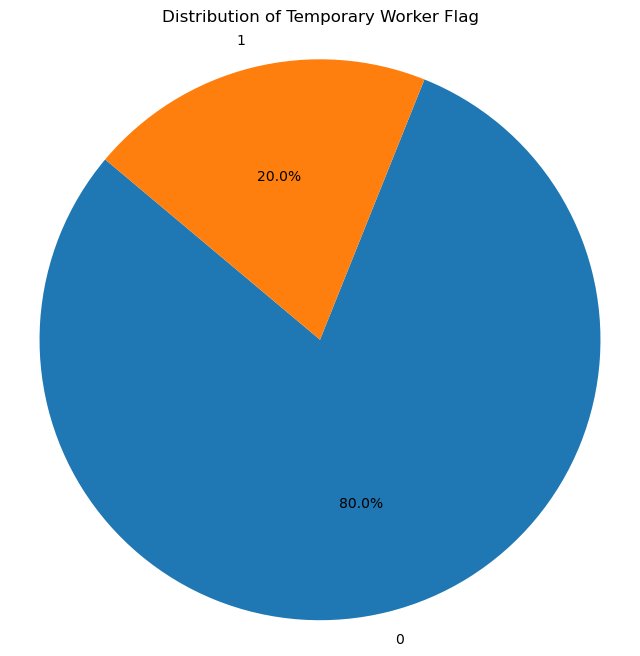

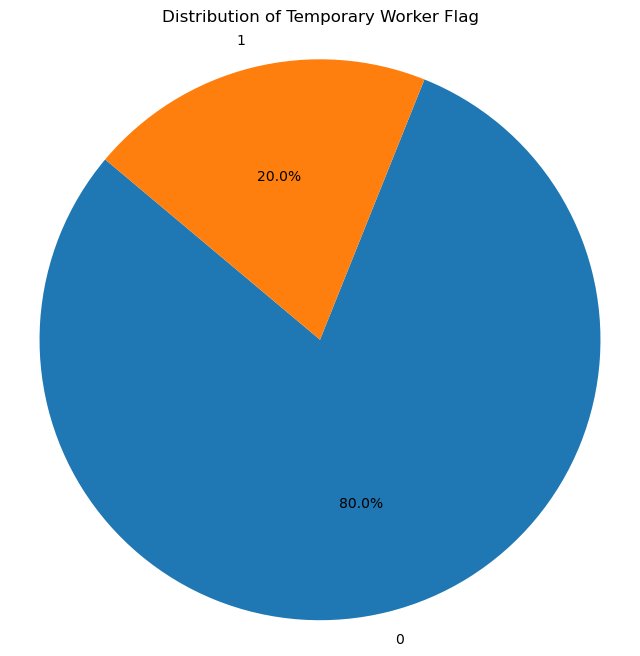

In [15]:
# Count the occurrences of each 'temporary_worker_flag' value
temporary_worker_counts = resources['temporary_worker_flag'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(temporary_worker_counts, labels=temporary_worker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Temporary Worker Flag')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show(())

In [16]:
resources.to_csv('~/Downloads/colab/resources.csv', index=False)

## Absences

In [17]:
absences = load_and_preview_dataset('absences', data_folder, 'absence_events.csv', sep=',')

Columns and data types of "absences" dataset


employee_number         int64
time_account_number    object
start_date             object
end_date               object
duration                int64
start_month             int64
season                 object
dtype: object

Number of rows of "absences" dataset 10352
Head of absences dataset


,employee_number,time_account_number,start_date,end_date,duration,start_month,season
0,1307,Urlaub bezahlt,2021-02-09,2021-02-09,1,2,Winter
1,1307,Urlaub bezahlt,2021-03-24,2021-03-28,5,3,Spring
2,1307,Urlaub bezahlt,2021-05-05,2021-05-09,5,5,Spring
3,1307,Urlaub bezahlt,2021-06-14,2021-06-17,4,6,Summer
4,1307,Urlaub bezahlt,2021-07-25,2021-07-28,4,7,Summer



Missing values in orders:
 employee_number        0
time_account_number    0
start_date             0
end_date               0
duration               0
start_month            0
season                 0
dtype: int64

Percentage of missing values in each column:
 employee_number        0.0
time_account_number    0.0
start_date             0.0
end_date               0.0
duration               0.0
start_month            0.0
season                 0.0
dtype: float64


In [18]:
data_types = {
    'employee_number': 'int32',
    'time_account_number':'object',
    'start_date':'object',
    'end_date':'object',               
    'duration':'int32',              
    'start_month' : 'int32',
    'season':'object' 
}
absences = absences.astype(data_types, errors='ignore')

print(absences.dtypes)


employee_number         int32
time_account_number    object
start_date             object
end_date               object
duration                int32
start_month             int32
season                 object
dtype: object


In [19]:
absences.to_csv('~/Downloads/colab/absences.csv', index=False)

## Tours

In [20]:
tours = load_and_preview_dataset('tours', data_folder, 'tours.csv', sep=',')

Columns and data types of "tours" dataset


tour_number               int64
service_date             object
operational_site         object
reference_tour_number     int64
reference_tour_code      object
dtype: object

Number of rows of "tours" dataset 138953
Head of tours dataset


,tour_number,service_date,operational_site,reference_tour_number,reference_tour_code
0,12964,10.11.2023,MONU,1,TP00335
1,38897,07.02.2022,MONU,1,TP00335
2,73190,21.10.2022,MONU,1,TP00335
3,54020,06.08.2021,MONU,1,TP00335
4,78256,27.01.2023,MONU,1,TP00335



Missing values in orders:
 tour_number              0
service_date             0
operational_site         1
reference_tour_number    0
reference_tour_code      0
dtype: int64

Percentage of missing values in each column:
 tour_number              0.00000
service_date             0.00000
operational_site         0.00072
reference_tour_number    0.00000
reference_tour_code      0.00000
dtype: float64


In [21]:
columns_to_keepp = [
    'tour_number', 
    'service_date', 
    'operational_site'
]

# Keep only the specified columns
tours_filtered = tours[columns_to_keepp]

# If you want to save the filtered DataFrame to a new CSV file
#df_filtered.to_csv('filtered_orders.csv', index=False)

# Display the first few rows of the filtered DataFrame
tours_filtered.head()

,tour_number,service_date,operational_site
0,12964,10.11.2023,MONU
1,38897,07.02.2022,MONU
2,73190,21.10.2022,MONU
3,54020,06.08.2021,MONU
4,78256,27.01.2023,MONU


In [22]:
tours.to_csv('~/Downloads/colab/tours.csv', index=False)

## Complaints(from customers)

In [23]:
complaints = load_and_preview_dataset('complaints', data_folder, 'claims.csv', sep=',')

Columns and data types of "complaints" dataset


C:\Users\s_sad\AppData\Local\Temp\ipykernel_5632\645262772.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{data_folder}/{filename}', sep=sep)


tour_number               int64
claim_number             object
complaint_reason          int64
complaint_ground         object
complaint_description    object
dtype: object

Number of rows of "complaints" dataset 790425
Head of complaints dataset


,tour_number,claim_number,complaint_reason,complaint_ground,complaint_description
0,160016,A241067066,402,BB Deckel beschädigt,großer Deckel - Hauptdeckel
1,122761,A240871203,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
2,97644,A240929593,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
3,121874,A240803399,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)
4,122263,A240977660,501,Ü Ladestelle beräumt,Mehrmengen mitgenommen (MMM)



Missing values in orders:
 tour_number                   0
claim_number                  0
complaint_reason              0
complaint_ground             24
complaint_description    557898
dtype: int64

Percentage of missing values in each column:
 tour_number               0.000000
claim_number              0.000000
complaint_reason          0.000000
complaint_ground          0.003036
complaint_description    70.582029
dtype: float64


In [24]:
complaints = complaints.drop(columns = ['complaint_description'])

In [25]:
complaints.head()

,tour_number,claim_number,complaint_reason,complaint_ground
0,160016,A241067066,402,BB Deckel beschädigt
1,122761,A240871203,501,Ü Ladestelle beräumt
2,97644,A240929593,501,Ü Ladestelle beräumt
3,121874,A240803399,501,Ü Ladestelle beräumt
4,122263,A240977660,501,Ü Ladestelle beräumt


In [26]:
complaints.to_csv('~/Downloads/colab/complaints.csv', index=False)

In [22]:
display(orders_filtered.columns)

Index(['customer_location', 'tour_number', 'equipment_number',
       'equipment_name', 'unit', 'article'],
      dtype='object')

In [23]:
display(resources.columns)

Index(['tour_number', 'employee_number', 'temporary_worker_flag',
       'primary_driver'],
      dtype='object')

In [24]:
display(absences.columns)

Index(['employee_number', 'time_account_number', 'start_date', 'end_date',
       'duration', 'start_month', 'season'],
      dtype='object')

In [25]:
display(tours_filtered.columns)

Index(['tour_number', 'service_date', 'operational_site'], dtype='object')

In [26]:
display(complaints.columns)

Index(['tour_number', 'claim_number', 'complaint_reason', 'complaint_ground'], dtype='object')

In [38]:
merged_df = pd.merge(orders_filtered, resources, on='tour_number', how='right')

In [39]:
# Select the required columns
required_data = merged_df[['customer_location', 'tour_number', 'equipment_number',
       'equipment_name', 'unit', 'article', 'employee_number', 'temporary_worker_flag',
       'primary_driver' ]]

In [43]:
required_data.to_csv('~/Downloads/colab/required_data.csv', index=False)

In [44]:
import pandas as pd

# Define a function to process chunks
def process_chunk(chunk, absences):
    return pd.merge(chunk, absences, on='employee_number', how='right')

# Read the large dataset in chunks
chunk_size = 100000  # Adjust based on your memory capacity
chunks = pd.read_csv(r"C:\Users\s_sad\Downloads\colab\required_data.csv", chunksize=chunk_size)

# Merge each chunk with the absences dataframe and store the results
result = pd.concat([process_chunk(chunk, absences) for chunk in chunks])

print(result)


MemoryError: Unable to allocate 1.70 MiB for an array with shape (1787530,) and data type bool

In [41]:
df1 = pd.merge(required_data, absences, on='employee_number', how='right')

MemoryError: Unable to allocate 4.59 GiB for an array with shape (616134676,) and data type int64

In [ ]:
import dask.dataframe as dd

# Load dataframes as Dask dataframes
required_data_dd = dd.from_pandas(required_data, npartitions=10)
absences_dd = dd.from_pandas(absences, npartitions=10)

# Perform the merge
result_dd = dd.merge(required_data_dd, absences_dd, on='employee_number', how='right')

# Compute the result
result = result_dd.compute()

print(result)
